# Data Cleaning, EDA, and Modeling - King County Housing

This notebook will outline an **_iterative_** approach to creating a sales price prediction model based on the King County Housing data set.  For our business case, a luxury real estate company serving sellers and buyers in the high income earning areas of King County, Washington would like to understand which housing features translate to higher housing prices in these areas, as well as develop a model to predict price based on housing features.
___

In [58]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
import requests
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('seaborn-darkgrid')

## Import and Examine Data
___

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.info() # Here is our base dataframe.  
# It consists of 21597 housing sales entries and 21 columns of data.  Date and sqft_basement are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


>Investigating the data we can see high standard deviations for the square foot living space, square foot lot.  Mean price is \$540,296 with a std deviation of \$367,368 and a max value of \$7.7 million.

In [5]:
df.drop_duplicates() #checking for duplicates, none found

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
col_list = list(df.columns) # Investigating placeholder and NaN values
for col in col_list:
    print(df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
5/17/2014       1
5/24/2015       1
1/31/2015       1
11/30/2014      1
1/10/2015       1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25

> We have seen that sqft_basement has a place holder value of '?'.  There are 454 entries with this value.  Rather than estimating or replacing these values, we are choosing to drop these entries.  We then cast this column as float instead of object so that we can use the numerical values.

In [7]:
df[df['sqft_basement']=='?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [8]:
df = df[df["sqft_basement"] != '?']

In [9]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

> Date is also stored as a string/object. Since we feel that the date the house was sold may have an impact on the sales price, we are converting it to a datetime object and then converting to an ordinal so we can use it in our model.

In [10]:
df["date"] = df["date"].map(lambda date: datetime.strptime(date, '%m/%d/%Y'))

In [11]:
df['date']=df['date'].map(datetime.toordinal)

> Waterfront has a significant number of NaN values.  Since we cannot know for certain if the house is on the waterfront, we are casting this variable as a string.  It will then have values of '0.0', '1.0', or 'NaN' and we will encode these as categories in our model.

In [12]:
df['waterfront']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21143, dtype: float64

In [13]:
df["waterfront"] = df["waterfront"].astype(str)

> The view variable is described as "Has been viewed".  We interpret this to mean that the listing has been viewed in the realtor multiple listing service (MLS) and do not believe that it is relevant to our model.

In [14]:
df.drop(columns = "view", inplace = True)

## Investigating distribution of variables

___

Now that the data has been cleaned we will look at plots of the data to look for linear relationships, normal distributions, and skew caused by outliers.

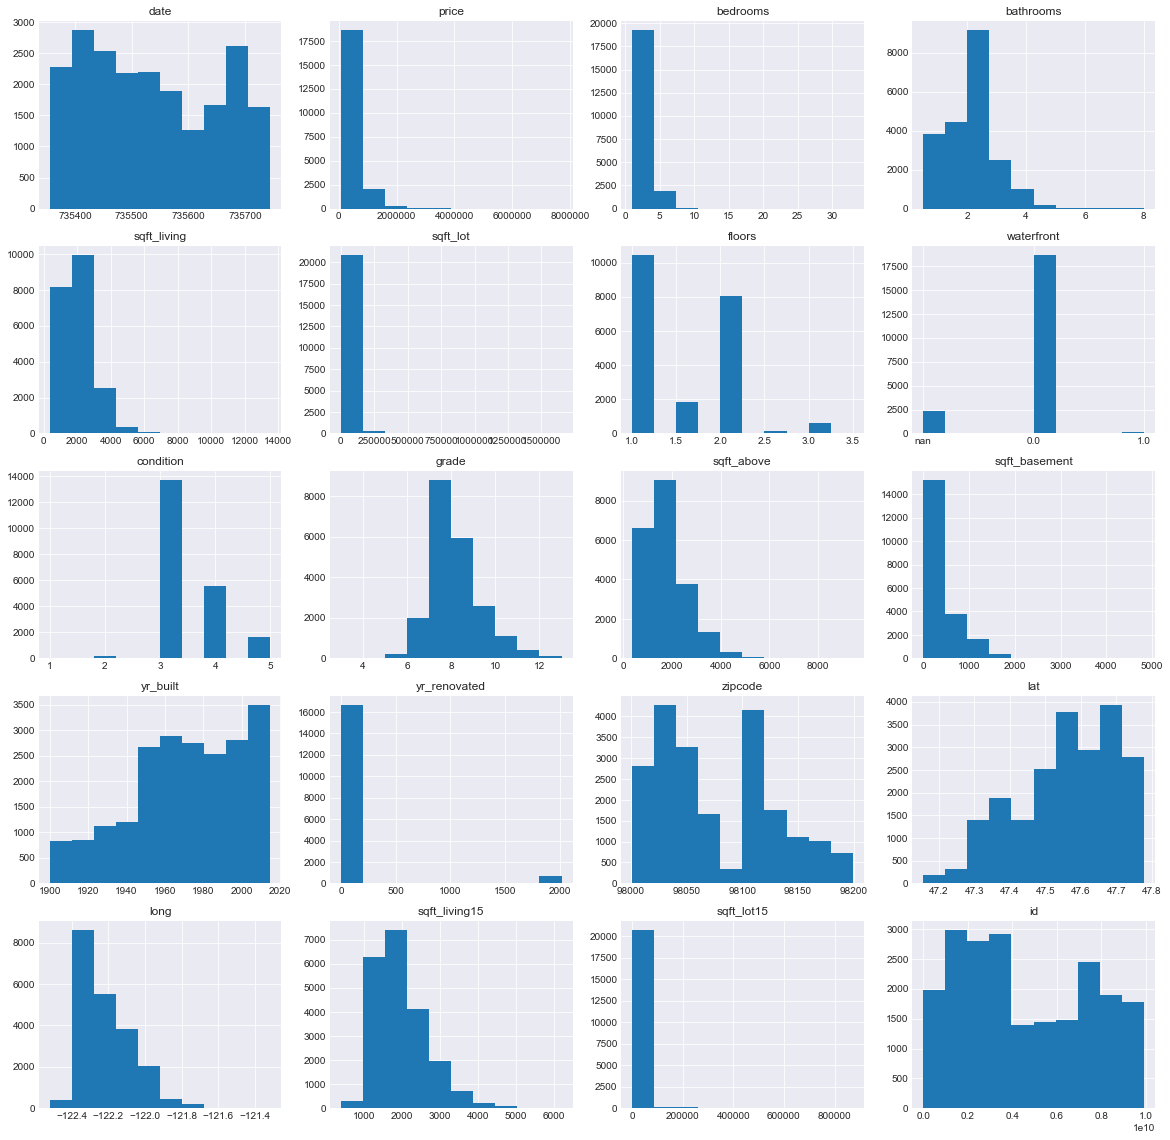

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df.price
for n in range(len(df.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df.iloc[:,n]
    ax.hist(y)
    ax.set_title(df.columns.values[n])
plt.show()   

> We can see in these histograms that many of the variables appear to be skewed by abnormally high outliers.  Some appear relatively normally distributed.  Several are obviously categorical.

> To investigate the outliers we will create box and whisker plots.

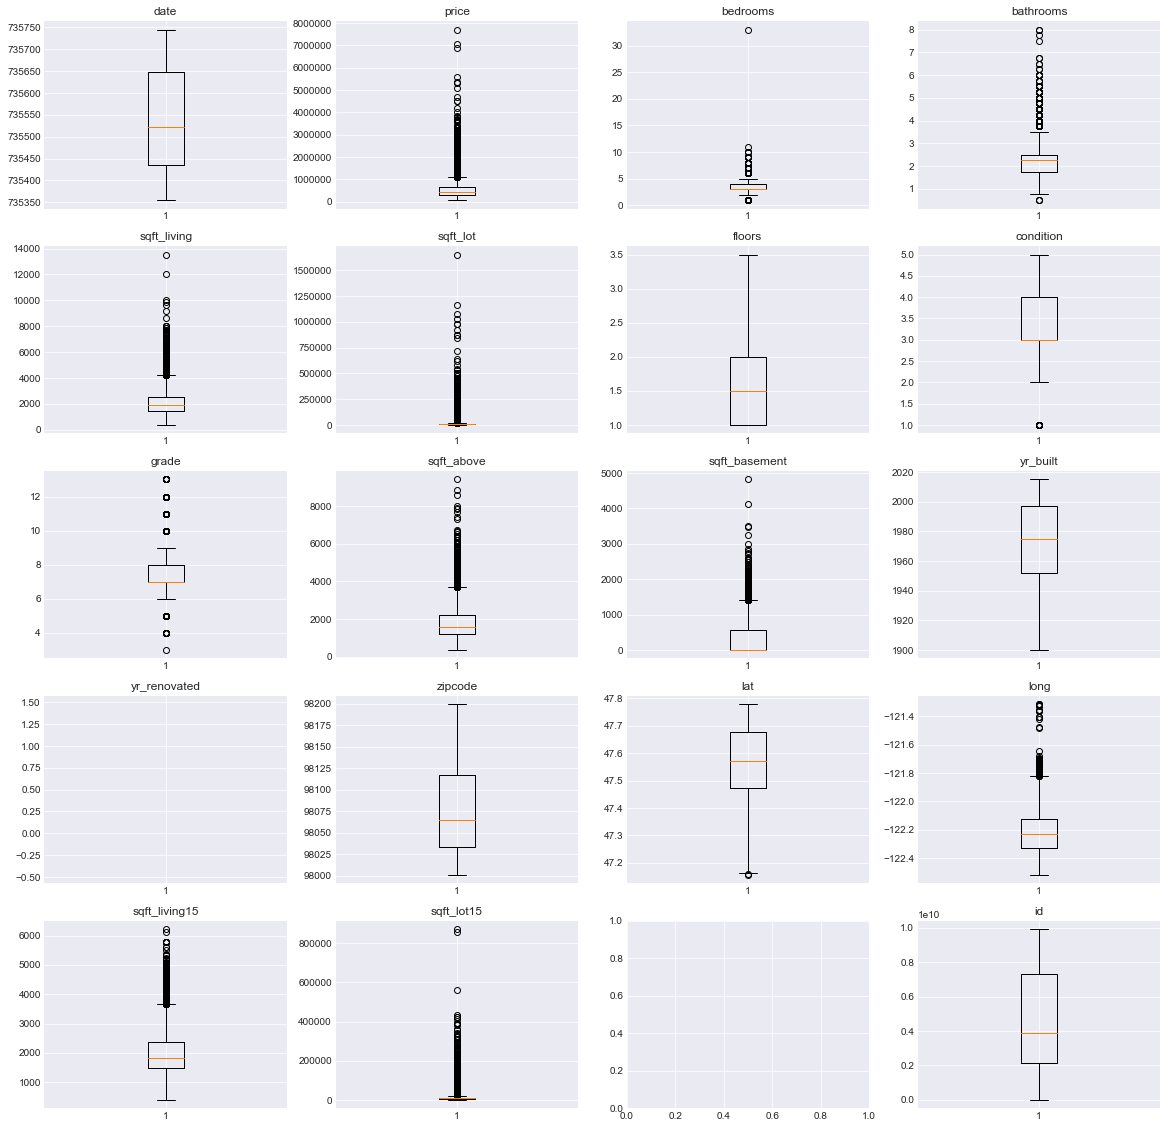

In [16]:
box_list = list(df.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

> Box plots show significant outliers in the data possibly due to very large, expensive houses in the dataset.

> Next we will create scatter plots to investigate independent variables relationship with price, our dependent variable.

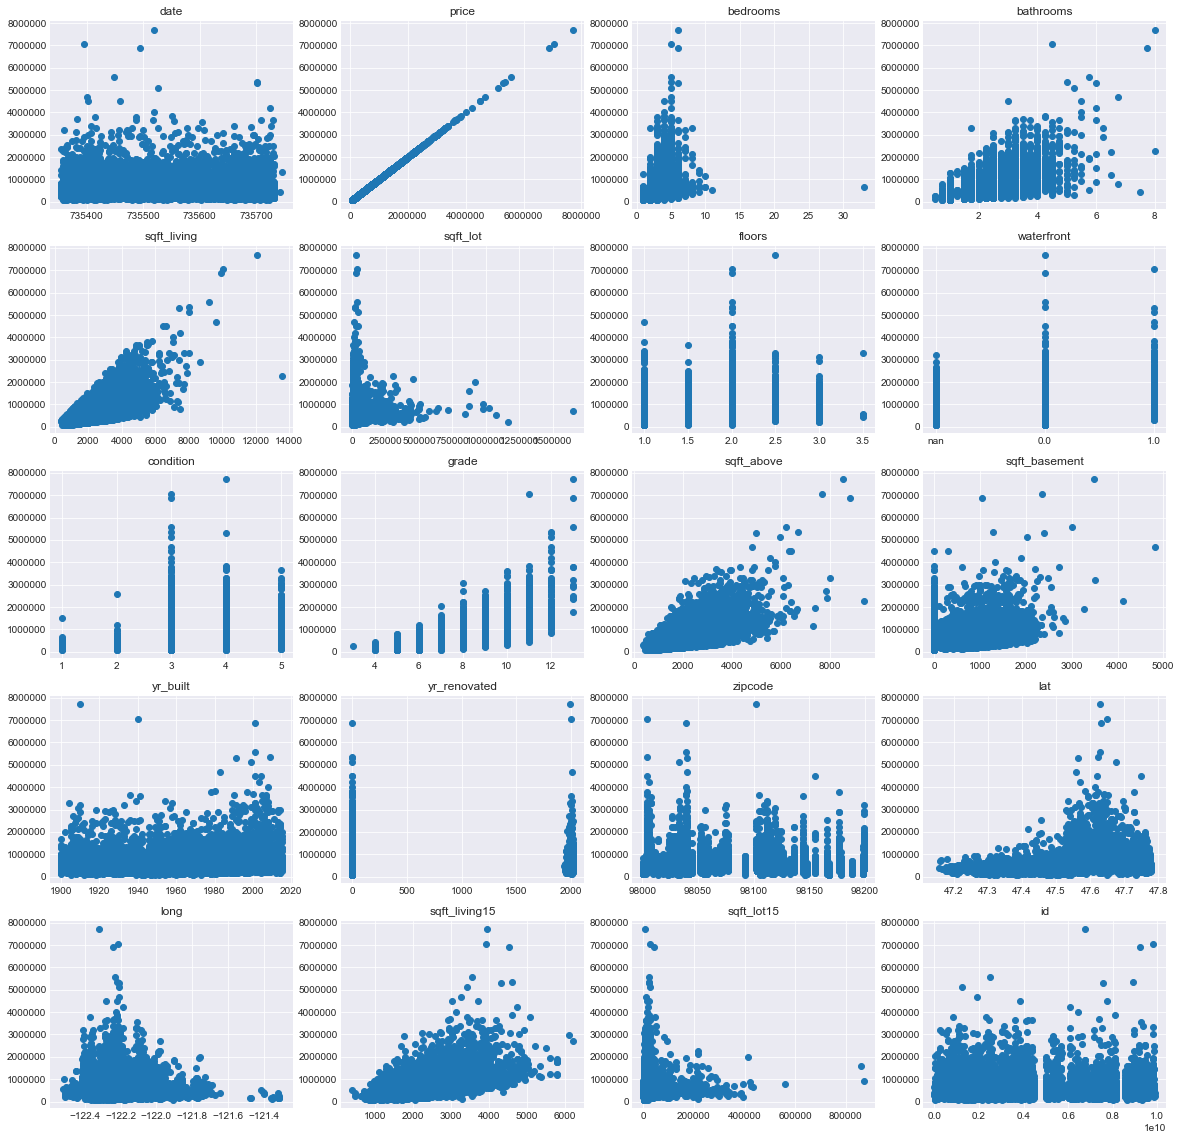

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df[column]
    y=df.price
    ax.scatter(x, y)
    ax.set_title(df.columns.values[n])
plt.show()   

## Subsetting data for business case

We are modeling for a luxury real estate company targeting high income buyers. We want to know what features these buyers look for in houses that translate to higher listing prices.  

Here we are reading in the data we retrieved from data.census.gov, giving us the top 30 zip codes in the state of Washington based on the Average Adjusted Gross Income per Tax Return.

In [18]:
zips = pd.read_csv('data/top_30_zips.csv')
zips.head()

,ZIP,returns,AGI,AGIperReturn
0,98039,1540.0,1808237.0,1174.179870
1,98040,12650.0,4405904.0,348.292806
2,98004,18840.0,6309943.0,334.922665
3,98112,12660.0,4202173.0,331.925197
4,98164,110.0,33940.0,308.545455


In [19]:
fourteen_zips = list(zips.ZIP[:14]) # The dataframe has 70 zip codes.  We are choosing the top 14, or 20%.

In [20]:
df["zipcode"].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [21]:
df_top_zip = df[df["zipcode"].isin(fourteen_zips)]

In [22]:
df_top_zip.shape # We now have 3192 entries in our dataframe, df_top_zip.

(3192, 20)

In [23]:
df_top_zip.zipcode.value_counts() 

98006    490
98074    433
98033    425
98053    397
98075    349
98004    315
98040    277
98112    261
98077    196
98039     49
Name: zipcode, dtype: int64

> Note that our dataframe only has 10 zipcode values because 4 of the top zips were not in King County or we had no sales data for those zipcodes.  

> We want to check the same data visualizations to examine the distributions of the subset

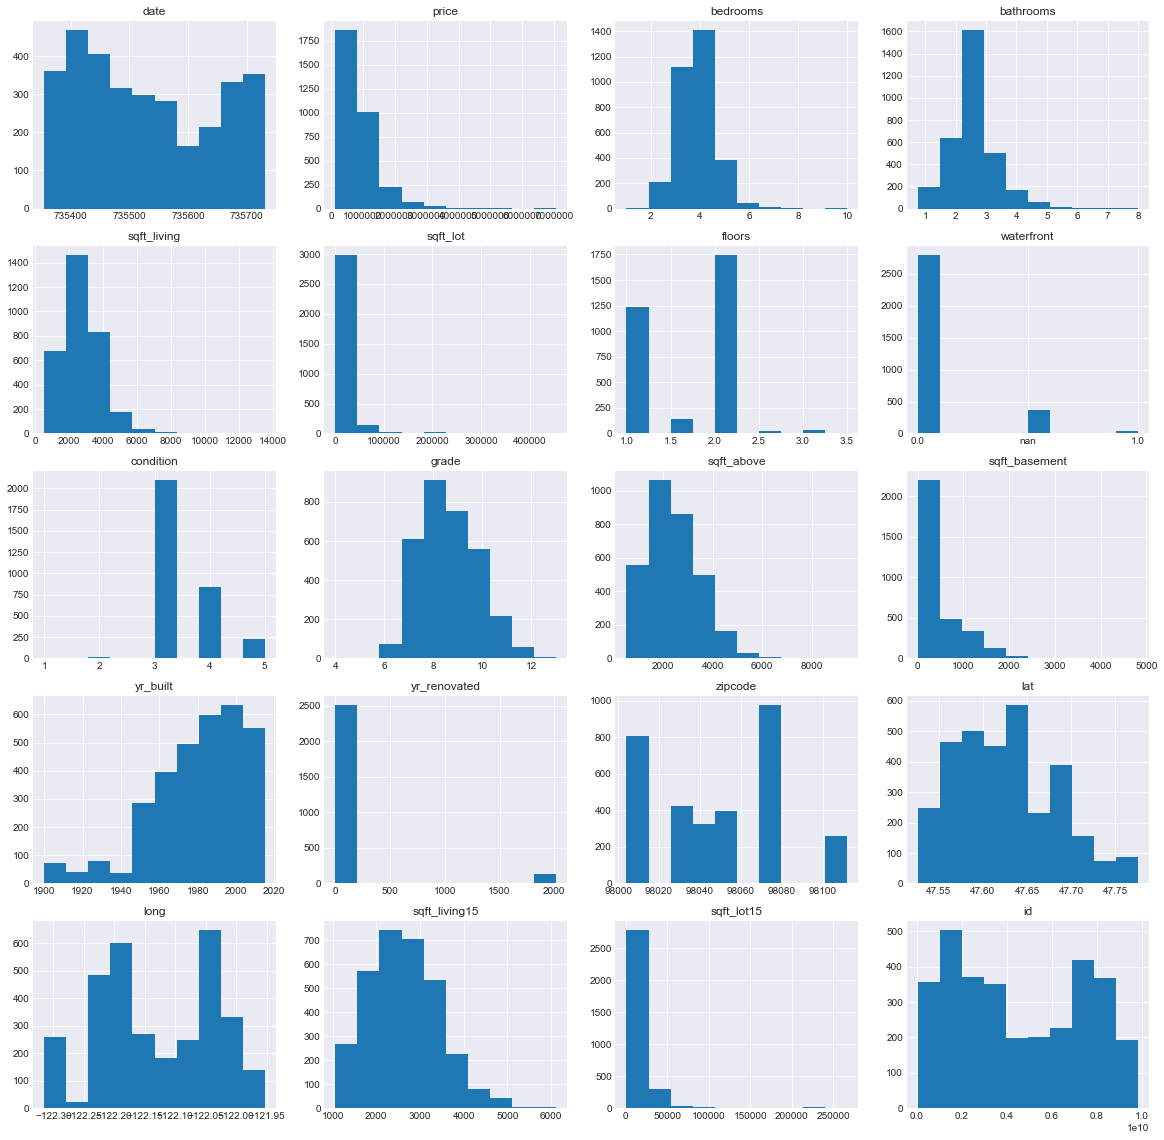

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
x = df_top_zip.price
for n in range(len(df_top_zip.columns)):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    y=df_top_zip.iloc[:,n]
    ax.hist(y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

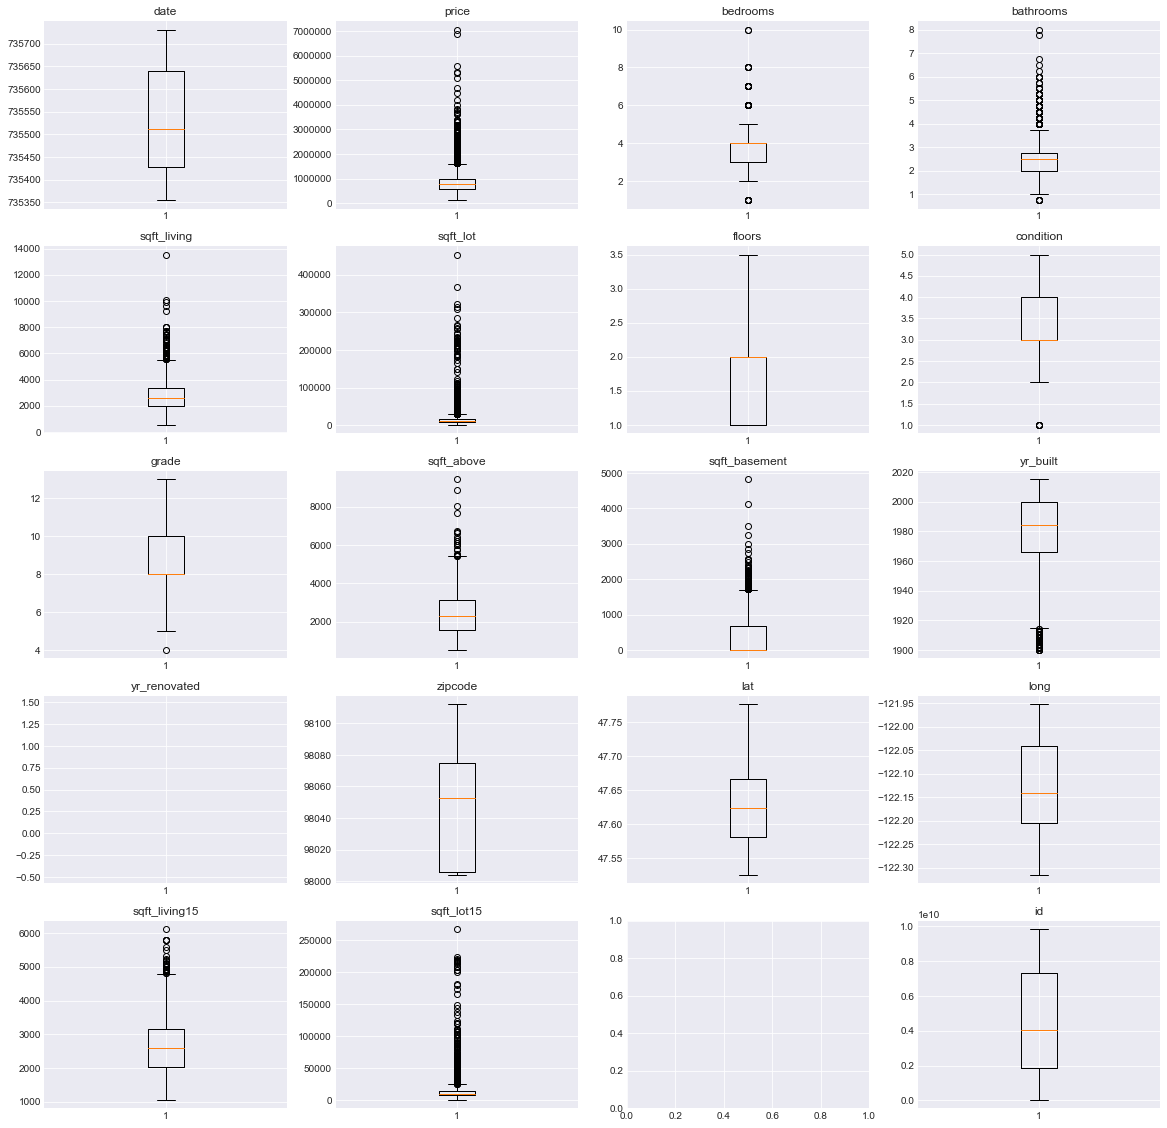

In [25]:
box_list = list(df_top_zip.columns)
box_list.remove('waterfront')

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(box_list):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
#     y=df.price
    ax.boxplot(x=x)
    ax.set_title(box_list[n])
plt.show()   

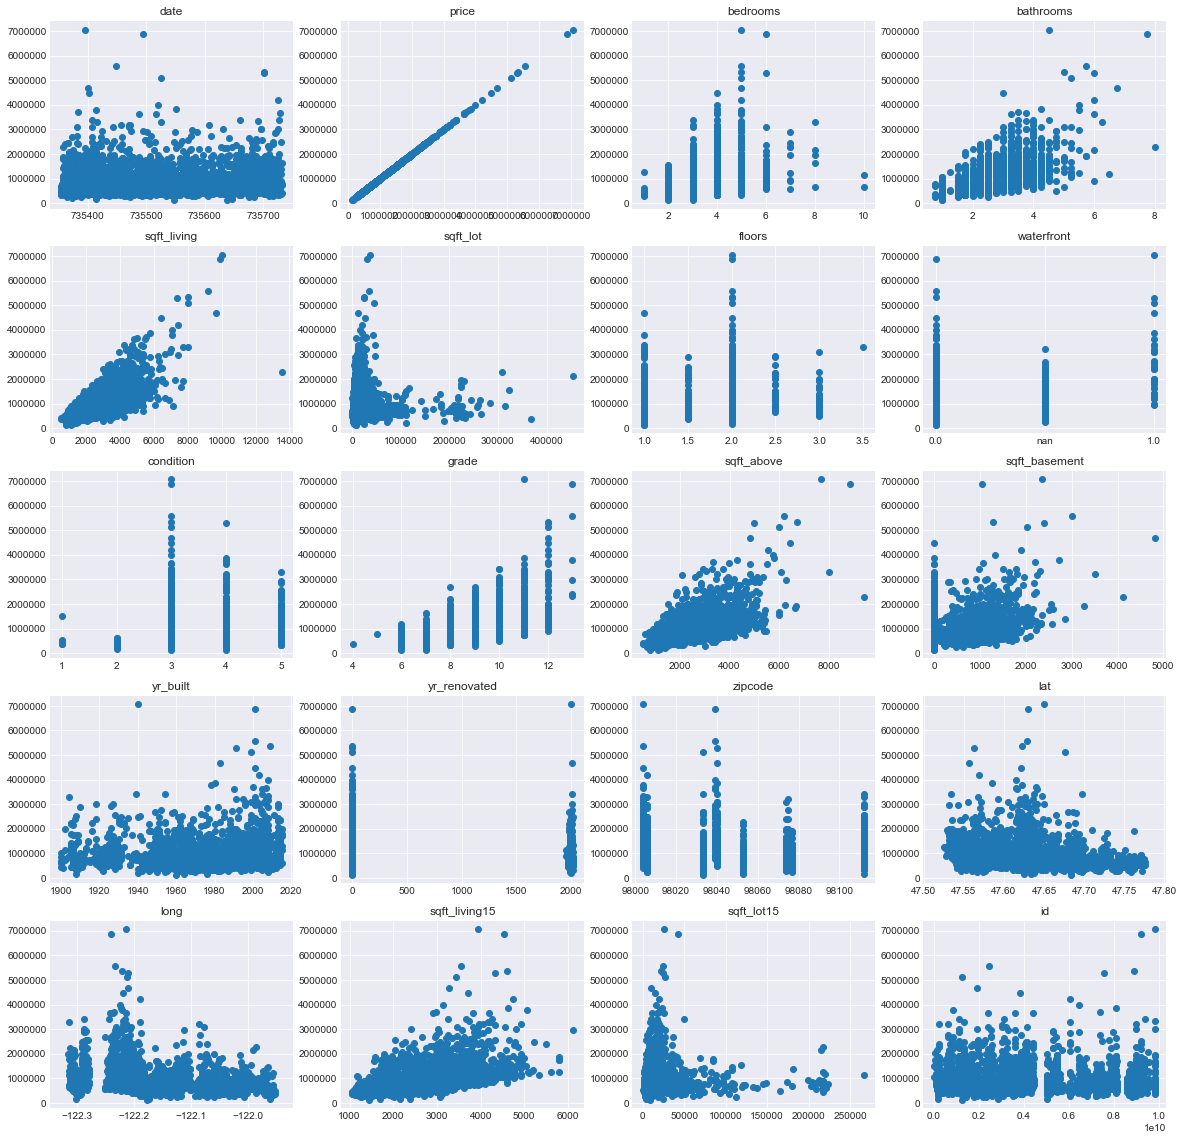

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
plt.title('Graphs')
for n, column in enumerate(df_top_zip.columns):
    row=(n-1)//4
    col=n%4-1
    ax=axes[row][col]
    x=df_top_zip[column]
    y=df_top_zip.price
    ax.scatter(x, y)
    ax.set_title(df_top_zip.columns.values[n])
plt.show()   

## Investigating multicollinearity

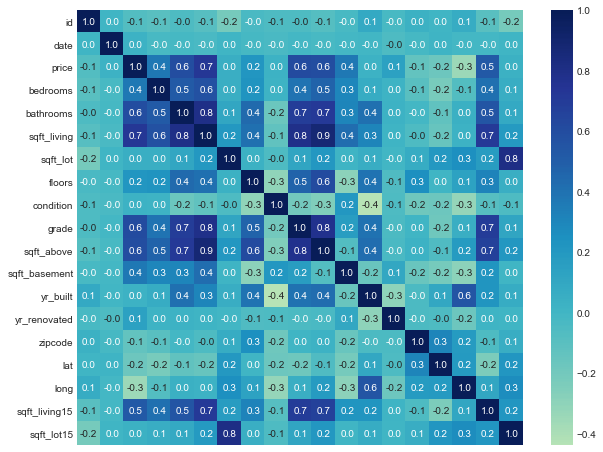

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df_top_zip.corr(), center=0, cmap="YlGnBu", annot=True, fmt=".1f", annot_kws={'size':10}, xticklabels=False)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
# plt.savefig('images/heatmap.png')

In [29]:
correlation_df = df_top_zip.corr()
correlation_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004197,-0.072561,-0.097088,-0.048326,-0.087069,-0.212432,-0.030574,-0.053810,-0.048444,-0.083656,-0.022469,0.095123,-0.027294,0.037869,0.007965,0.071681,-0.091226,-0.210786
date,0.004197,1.000000,0.028610,-0.027630,-0.020767,-0.028695,0.005349,-0.021416,-0.031237,-0.013869,-0.026779,-0.008867,-0.000988,-0.045072,-0.020273,0.014711,-0.011753,-0.008908,0.006759
price,-0.072561,0.028610,1.000000,0.370082,0.601021,0.725306,0.047001,0.215821,0.025737,0.615902,0.597040,0.371540,0.023982,0.142075,-0.136483,-0.169639,-0.347710,0.525086,0.038250
bedrooms,-0.097088,-0.027630,0.370082,1.000000,0.520524,0.577827,0.047149,0.235819,0.021688,0.392482,0.471902,0.302899,0.066424,0.018856,-0.094527,-0.222303,-0.075676,0.414127,0.061008
bathrooms,-0.048326,-0.020767,0.601021,0.520524,1.000000,0.803328,0.102307,0.441975,-0.164291,0.685504,0.716726,0.309084,0.406146,0.029782,-0.010975,-0.128821,0.042740,0.549592,0.094366
sqft_living,-0.087069,-0.028695,0.725306,0.577827,0.803328,1.000000,0.198010,0.413557,-0.126011,0.787340,0.871379,0.423196,0.303950,0.016518,-0.049848,-0.155642,0.025892,0.715847,0.190337
sqft_lot,-0.212432,0.005349,0.047001,0.047149,0.102307,0.198010,1.000000,0.034593,-0.046774,0.113314,0.211058,0.012666,0.057087,-0.001842,0.067545,0.198696,0.253471,0.175589,0.805072
floors,-0.030574,-0.021416,0.215821,0.235819,0.441975,0.413557,0.034593,1.000000,-0.304394,0.476624,0.611760,-0.289251,0.396076,-0.059928,0.253490,0.002162,0.134946,0.317765,0.045789
condition,-0.053810,-0.031237,0.025737,0.021688,-0.164291,-0.126011,-0.046774,-0.304394,1.000000,-0.201122,-0.251023,0.207472,-0.438029,-0.050418,-0.180276,-0.172372,-0.320243,-0.089197,-0.051811
grade,-0.048444,-0.013869,0.615902,0.392482,0.685504,0.787340,0.113314,0.476624,-0.201122,1.000000,0.777299,0.164724,0.399951,-0.040987,0.001298,-0.181413,0.052870,0.695382,0.117474


In [30]:
correlation_df.applymap(lambda val: abs(val) >= 0.75)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
date,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False


In [31]:
corr_data = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:11]

,level_0,level_1,0
195,sqft_above,sqft_living,0.876678
105,sqft_living,sqft_above,0.876678
104,sqft_living,grade,0.763101
176,grade,sqft_living,0.763101
328,sqft_living15,sqft_living,0.756389
112,sqft_living,sqft_living15,0.756389
181,grade,sqft_above,0.756382
199,sqft_above,grade,0.756382
99,sqft_living,bathrooms,0.755278
81,bathrooms,sqft_living,0.755278


> It appears that there is strong correlation between:
 - sqft living/sqft above
 - sqft living/grade
 - sqft living 15/sqft living
 - grade/sqft above
 - bathrooms/sqft living
 
 > Check pairplots

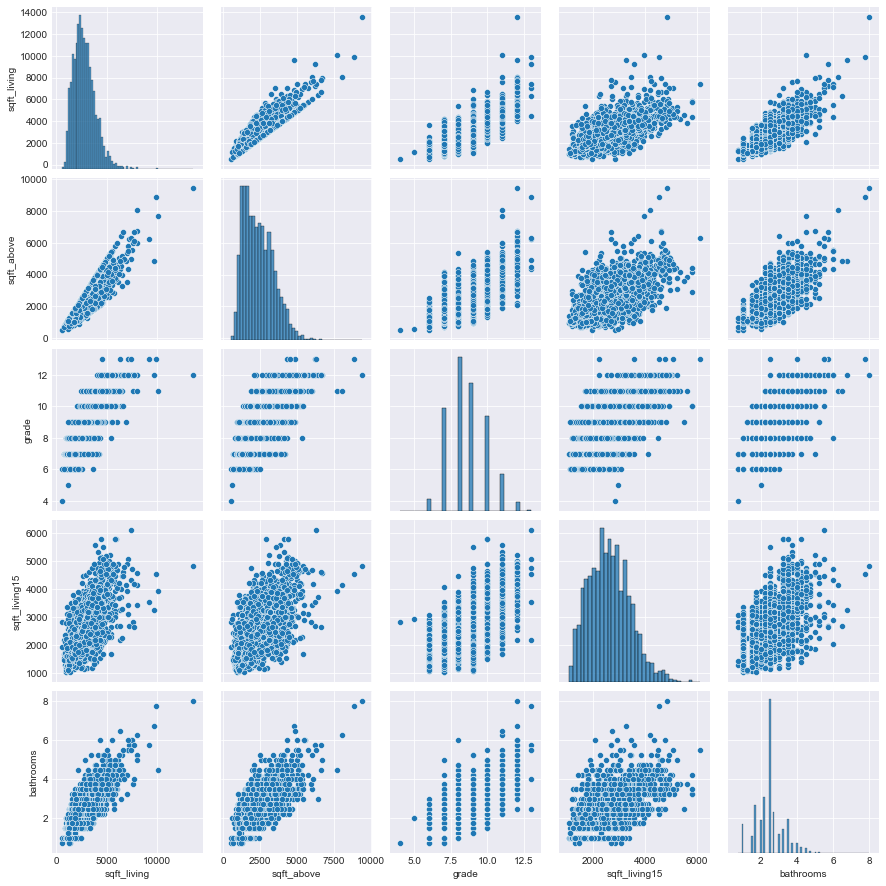

In [32]:
sns.pairplot(df_top_zip[["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]]);
plt.savefig('images/multicolinear_pairplot.png')

## Prepare data for modeling - One Hot Encoding

Divide data into categorical and continuous. 
Create dummy variables for categorical data so they can be read into model

In [33]:
df_top_zip['yr_renovated'].value_counts()

0.0       2513
2014.0      10
2007.0       9
2003.0       8
2000.0       7
2005.0       6
2009.0       6
2001.0       6
1992.0       5
2010.0       5
1990.0       5
1997.0       4
2013.0       4
2002.0       4
1991.0       4
1980.0       4
2006.0       3
1985.0       3
2012.0       3
1993.0       3
2015.0       3
1979.0       3
2004.0       3
1995.0       3
1970.0       3
2008.0       2
1987.0       2
1986.0       2
1988.0       2
1989.0       2
1982.0       2
1999.0       2
1963.0       1
1956.0       1
1984.0       1
1954.0       1
1977.0       1
2011.0       1
1973.0       1
1996.0       1
1975.0       1
1998.0       1
Name: yr_renovated, dtype: int64

> Rather than one hot encoding the yr_renovated variable since there were so many possible values, we decided to create bins instead.  There will be one bin for every 20 years of the last 100 years (which covers all years in the data).  There will also be a bin for yr_renovated == 0, which we interpret as meaning the house has never been renovated.  Then there will also be a bin for any NaN values in yr_renovated.

In [34]:
df_top_zip = df_top_zip.assign(reno_2000_over=
                               df_top_zip.yr_renovated.map(lambda year: 1 if year >= 2000 else 0))

In [35]:
df_top_zip = df_top_zip.assign(reno_1980_2000=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1980 and year < 2000) else 0))

In [36]:
df_top_zip = df_top_zip.assign(reno_1960_1980=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1960 and year < 1980) else 0))

In [37]:
df_top_zip = df_top_zip.assign(reno_1940_1960=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1940 and year < 1960) else 0))

In [38]:
df_top_zip = df_top_zip.assign(reno_1920_1940=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if (year >= 1920 and year < 1940) else 0))

In [39]:
df_top_zip = df_top_zip.assign(reno_never=
                               df_top_zip["yr_renovated"].map(lambda year: 1 if year == 0 else 0))

In [40]:
df_top_zip = df_top_zip.assign(reno_nan=
                               df_top_zip["yr_renovated"].map(lambda year:  1 if np.isnan(year) else 0))

In [41]:
df_top_zip

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,long,sqft_living15,sqft_lot15,reno_2000_over,reno_1980_2000,reno_1960_1980,reno_1940_1960,reno_1920_1940,reno_never,reno_nan
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,-122.045,1800,7503,0,0,0,0,0,1,0
5,7237550310,735365,1230000.0,4,4.50,5420,101930,1.0,0.0,3,...,-122.005,4760,101930,0,0,0,0,0,1,0
13,6054650070,735513,400000.0,3,1.75,1370,9680,1.0,0.0,4,...,-122.045,1370,10208,0,0,0,0,0,1,0
21,2524049179,735471,2000000.0,3,2.75,3050,44867,1.0,0.0,3,...,-122.233,4110,20336,0,0,0,0,0,1,0
27,3303700376,735568,667000.0,3,1.00,1400,1581,1.5,0.0,5,...,-122.314,1860,3861,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,688000017,735411,516500.0,1,1.25,1100,638,3.0,nan,3,...,-122.307,1110,1933,0,0,0,0,0,1,0
21552,524059330,735628,1700000.0,4,3.50,3830,8963,2.0,0.0,3,...,-122.197,2190,10777,0,0,0,0,0,1,0
21574,7430200100,735367,1220000.0,4,3.50,4910,9444,1.5,0.0,3,...,-122.066,4560,11063,0,0,0,0,0,1,0
21583,7202300110,735491,810000.0,4,3.00,3990,7838,2.0,0.0,3,...,-122.046,3370,6814,0,0,0,0,0,0,1


In [42]:
df_nona = df_top_zip.drop(columns = ["yr_renovated", "reno_nan"])

> We needed to drop a yr_renovated dummy variable to prevent multicolinearity so we have chosen to drop the dummy column reno_nan

In [43]:
categorical = ["waterfront", "condition", "grade", "floors", "bedrooms", "zipcode"]
continuous = ["id", "date", "price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", 
              "sqft_basement", "yr_built", "lat", "long", "sqft_living15", "sqft_lot15"]

** year renovated was not included in categorical list, as it has been manually binned as a dummy variable

In [44]:
df_cat = pd.DataFrame([])

for col in categorical:
    df_cat = pd.concat([df_cat, pd.get_dummies(df_nona[col], prefix= col[:3], drop_first=True)], axis=1)

In [45]:
df_cat.columns

Index(['wat_1.0', 'wat_nan', 'con_2', 'con_3', 'con_4', 'con_5', 'gra_5',
       'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11', 'gra_12',
       'gra_13', 'flo_1.5', 'flo_2.0', 'flo_2.5', 'flo_3.0', 'flo_3.5',
       'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_10',
       'zip_98006', 'zip_98033', 'zip_98039', 'zip_98040', 'zip_98053',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98112'],
      dtype='object')

> Dummy variables that got dropped:
* Reno_nan
* Waterfront_0.0
* Condition_1
* Grade_4
* Floors_1.0
* Bedrooms_1
* Zip_98004

> Now the results of our model will be changes in price relative to these values.

In [46]:
df_joined = pd.concat([df_nona, df_cat], axis=1)

In [47]:
df_joined.drop(columns = categorical, axis=1, inplace = True)

In [48]:
df_joined.columns

Index(['id', 'date', 'price', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'reno_2000_over', 'reno_1980_2000',
       'reno_1960_1980', 'reno_1940_1960', 'reno_1920_1940', 'reno_never',
       'wat_1.0', 'wat_nan', 'con_2', 'con_3', 'con_4', 'con_5', 'gra_5',
       'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11', 'gra_12',
       'gra_13', 'flo_1.5', 'flo_2.0', 'flo_2.5', 'flo_3.0', 'flo_3.5',
       'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_10',
       'zip_98006', 'zip_98033', 'zip_98039', 'zip_98040', 'zip_98053',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98112'],
      dtype='object')

> We feel we have a clean and one hot encoded dataset right now and this would be a good place to save our data to a csv

In [49]:
df_joined.to_csv("data/df_joined.csv", index=False)

## Remove data outliers

We will now use IQR to remove price outliers from the dataset before our train test split, and check the new distribution

In [50]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

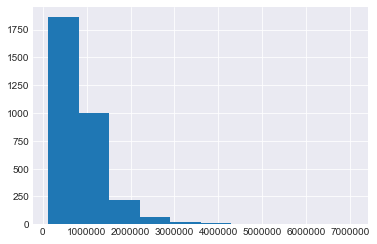

In [51]:
plt.hist(x=df_joined["price"]); # This is our current price distribution

> The scale of our price histogram indicates that there are some very high price values that may be skewing our data.

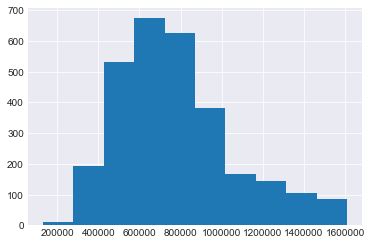

In [52]:
plt.hist(x = remove_outliers(df_joined, "price")["price"]);

> The distribution looks much more Normal now, although still with a heavy upper tail

In [53]:
y = remove_outliers(df_joined, "price")["price"]
X = remove_outliers(df_joined, "price").drop(columns = "price", axis=1)

## Baseline model and train, test, split

We have chosen to split our data 80% for training and 20% for testing.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train ,X_int).fit()
summary = model.summary()           #The baseline model is defined as 'model'.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:05:25   Log-Likelihood:                -30867.
No. Observations:                2334   AIC:                         6.184e+04
Df Residuals:                    2283   BIC:                         6.213e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.502e+08   2.53e+07     -9.879      0.000      -3e+08      -2e+08
id             -8.114e-07   1.04e-06     -0.778      0.436   -2.86e-06    1.23e-06
date             105.5687     25.081      4.209      0.000      56.385     154.753
bathrooms       3.672e+04   6882.165      5.335      0.000    2.32e+04    5.02e+04
sqft_living       76.4520      4.562     16.759      0.000      67.506      85.398
sqft_lot           0.2518      0.163      1.540      0.124      -0.069       0.572
sqft_above        60.7503      4.521     13.436      0.000      51.884      69.617
sqft_basement     15.0964      4.986      3.028      0.002       5.318      24.875
yr_built         446.6796    226.002      1.976      0.048       3.489     889.870
lat             5.342e+05   1.89e+05      2.824      0.005    1.63e+05    9.05e+05
long           -1.199e+06   1.41e+05     -8.488      0.000   -1.48e+06   -9.22e+05
sqft_living15     54.2103      6.360      8.523      0.000      41.738      66.683
sqft_lot15         0.0383      0.217      0.177      0.860      -0.386       0.463
reno_2000_over  5.832e+04   2.41e+04      2.417      0.016     1.1e+04    1.06e+05
reno_1980_2000   3.74e+04   2.71e+04      1.382      0.167   -1.57e+04    9.05e+04
reno_1960_1980 -9.071e+04   5.49e+04     -1.652      0.099   -1.98e+05     1.7e+04
reno_1940_1960  1.689e+05   9.95e+04      1.697      0.090   -2.63e+04    3.64e+05
reno_1920_1940   5.14e-07    2.9e-07      1.773      0.076   -5.46e-08    1.08e-06
reno_never      -1.76e+04   7590.431     -2.318      0.021   -3.25e+04   -2712.339
wat_1.0         5.291e+05   6.05e+04      8.752      0.000    4.11e+05    6.48e+05
wat_nan        -7507.3223   8958.592     -0.838      0.402   -2.51e+04    1.01e+04
con_2           4.672e+04    8.2e+04      0.570      0.569   -1.14e+05    2.08e+05
con_3           9.929e+04   6.87e+04      1.446      0.148   -3.54e+04    2.34e+05
con_4           1.311e+05   6.85e+04      1.913      0.056   -3285.742    2.65e+05
con_5            1.89e+05   6.92e+04      2.732      0.006    5.34e+04    3.25e+05
gra_5           3.921e+05   2.19e+05      1.793      0.073   -3.68e+04    8.21e+05
gra_6           7.985e+04   1.72e+05      0.463      0.643   -2.58e+05    4.18e+05
gra_7           9.158e+04   1.71e+05      0.535      0.593   -2.44e+05    4.28e+05
gra_8           1.431e+05   1.71e+05      0.836      0.403   -1.92e+05    4.79e+05
gra_9           2.345e+05   1.71e+05      1.368      0.172   -1.02e+05    5.71e+05
gra_10          2.763e+05   1.72e+05      1.609      0.108   -6.04e+04    6.13e+05
gra_11          3.711e+05   1.72e+05      2.155      0.031    3.34e+04    7.09e+05
gra_12          4.611e+05   1.75e+05      2.630      0.009    1.17e+05    8.05e+05
gra_13         -9.293e-11   8.63e-11     -1.076      0.282   -2.62e-10    7.64e-11
flo_1.5     

> * Our **baseline model** has an adjusted R squared value of .774.
* The Skew is 0.468
* The Kurtosis is 5.445
* The Jarque-Bera score is 666.713
* There are 2334 observations
* The Df Model is 50
* The train RMSE is 134041


In [62]:
y_hat = model.predict()
train_rmse = mean_squared_error(y_train,y_hat)**.5
train_rmse

134041.96298701665

> Check normality assumption with QQ plot

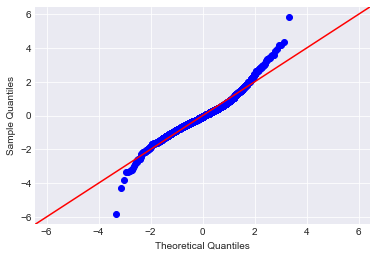

In [65]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.savefig('images/baselineQQplot.png')

> This QQ plot indicates that our data has very heavy tails compared to a normal distribution of residuals.

In [66]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 666.7129357958048),
 ('Prob', 1.6792891623624488e-145),
 ('Skew', 0.46845304021746154),
 ('Kurtosis', 5.444967689894317)]

> The Jarque-Bera result is very high indicating that our results are not normally distributed.

> Next we will check for homoscedasticity.

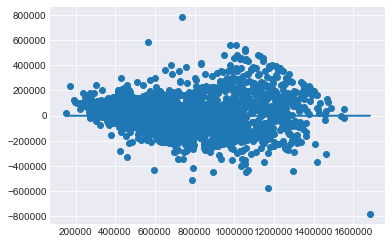

In [67]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

> This displays a slight 'funnel' shape: errors appear to increase as the list_price reaches 1 million, then decrease. This indicates slight heteroscedasticity.

## Eliminate high p-values and remodel

Check the p-values for each independent variable in the model and remove those that are insignificant at alpha = .05

In [68]:
p_table = summary.tables[1]
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-2.502e+08,2.53e+07,-9.879,0.000,-3e+08,-2e+08
id,-8.114e-07,1.04e-06,-0.778,0.436,-2.86e-06,1.23e-06
date,105.5687,25.081,4.209,0.000,56.385,154.753
bathrooms,3.672e+04,6882.165,5.335,0.000,2.32e+04,5.02e+04
sqft_living,76.4520,4.562,16.759,0.000,67.506,85.398
sqft_lot,0.2518,0.163,1.540,0.124,-0.069,0.572
sqft_above,60.7503,4.521,13.436,0.000,51.884,69.617
sqft_basement,15.0964,4.986,3.028,0.002,5.318,24.875
yr_built,446.6796,226.002,1.976,0.048,3.489,889.870
lat,5.342e+05,1.89e+05,2.824,0.005,1.63e+05,9.05e+05


In [69]:
p_table_df = pd.DataFrame(p_table.data) # Convert p_table data to dataframe
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, const to zip_98112
Data columns (total 6 columns):
coef       56 non-null object
std err    56 non-null object
t          56 non-null object
P>|t|      56 non-null float64
0.025      56 non-null object
0.975      56 non-null object
dtypes: float64(1), object(5)
memory usage: 3.1+ KB


In [71]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05) # Calculate pass_list of variables with significant p_values
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list

['const',
 'date',
 'bathrooms',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'reno_2000_over',
 'reno_never',
 'wat_1.0',
 'con_5',
 'gra_11',
 'gra_12',
 'flo_2.0',
 'flo_3.0',
 'bed_7',
 'zip_98006',
 'zip_98033',
 'zip_98039',
 'zip_98040',
 'zip_98053',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98112']

In [72]:
len(pass_list)

28

Of our 55 number of independent variables, 27 (not including the constant) have significantly low p-values so we can reject the null hypothesis that there is no relationship between these variables and the dependent variable.

In [73]:
pass_list.remove('const')
trained2 = X_train[pass_list] # Eliminating high p_values

> Recheck multicolinearity

In [74]:
trained2.corr().applymap(lambda val: abs(val) >= 0.75)

,date,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,reno_2000_over,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
reno_2000_over,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [76]:
corr_data = trained2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:10]

,level_0,level_1,0
83,sqft_above,sqft_living,0.856139
57,sqft_living,sqft_above,0.856139
29,bathrooms,sqft_living,0.757508
55,sqft_living,bathrooms,0.757508
218,sqft_living15,sqft_living,0.749152
62,sqft_living,sqft_living15,0.749152
89,sqft_above,sqft_living15,0.693520
219,sqft_living15,sqft_above,0.693520
30,bathrooms,sqft_above,0.658669
82,sqft_above,bathrooms,0.658669


> There seems to be significant multicollinearity between certain independent variables. To reduce this, we will remove sqft_living which seems to be highly correlated with many variables.

In [77]:
trained2.drop(columns = "sqft_living", inplace = True)

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


> Now we will adjust the test data in the same way as the trained data

In [78]:
test2 = X_test[pass_list]
test2.drop(columns = "sqft_living", inplace = True)

## Run model number two

In [79]:
X_int_2 = sm.add_constant(trained2)
model2 = sm.OLS(y_train, X_int_2).fit()
summary2 = model2.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     270.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:30:38   Log-Likelihood:                -30994.
No. Observations:                2334   AIC:                         6.204e+04
Df Residuals:                    2307   BIC:                         6.220e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.596e+08   2.62e+07     -9.925      0.000   -3.11e+08   -2.08e+08
date             116.7319     26.222      4.452      0.000      65.311     168.153
bathrooms       3.411e+04   6959.709      4.901      0.000    2.05e+04    4.78e+04
sqft_above       170.1643      6.752     25.201      0.000     156.923     183.406
sqft_basement    103.1606      8.299     12.431      0.000      86.887     119.434
yr_built         988.7289    204.387      4.838      0.000     587.928    1389.530
lat             4.469e+05   1.91e+05      2.339      0.019    7.22e+04    8.22e+05
long           -1.235e+06   1.45e+05     -8.502      0.000   -1.52e+06    -9.5e+05
sqft_living15     80.2275      6.338     12.659      0.000      67.799      92.656
reno_2000_over  4.782e+04   2.47e+04      1.936      0.053    -617.297    9.63e+04
reno_never         -2e+04   7679.630     -2.605      0.009   -3.51e+04   -4944.899
wat_1.0         5.407e+05   6.01e+04      8.993      0.000    4.23e+05    6.59e+05
con_5           6.707e+04   1.25e+04      5.354      0.000    4.25e+04    9.16e+04
gra_11           9.28e+04    1.5e+04      6.178      0.000    6.33e+04    1.22e+05
gra_12          1.449e+05   3.63e+04      3.994      0.000    7.37e+04    2.16e+05
flo_2.0        -4.156e+04   8884.142     -4.678      0.000    -5.9e+04   -2.41e+04
flo_3.0        -8.894e+04    3.5e+04     -2.539      0.011   -1.58e+05   -2.03e+04
bed_7          -6.167e+05   1.45e+05     -4.259      0.000   -9.01e+05   -3.33e+05
zip_98006      -2.493e+05   1.81e+04    -13.777      0.000   -2.85e+05   -2.14e+05
zip_98033      -2.769e+05   1.86e+04    -14.906      0.000   -3.13e+05    -2.4e+05
zip_98039       1.194e+05   4.46e+04      2.679      0.007     3.2e+04    2.07e+05
zip_98040       -1.33e+05   1.85e+04     -7.202      0.000   -1.69e+05   -9.68e+04
zip_98053      -2.454e+05   3.26e+04     -7.526      0.000   -3.09e+05   -1.81e+05
zip_98074      -2.464e+05   2.63e+04     -9.350      0.000   -2.98e+05   -1.95e+05
zip_98075      -2.071e+05   2.93e+04     -7.066      0.000   -2.65e+05    -1.5e+05
zip_98077      -3.673e+05   3.78e+04     -9.719      0.000   -4.41e+05   -2.93e+05
zip_98112      -1.562e+05   2.09e+04     -7.459      0.000   -1.97e+05   -1.15e+05
==============================================================================
Omnibus:                      224.323   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.527
Skew:                           0.484   Prob(JB):                    7.63e-153
Kurtosis:                       5.503   Cond. No.                     6.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditio

> * Our **model2** has an adjusted R squared value of .750.
* The Skew is 0.484
* The Kurtosis is 5.503
* The Jarque-Bera score is 700.527
* There are 2334 observations
* The Df Model is 26
* The train RMSE is 141559

In [80]:
y_hat2 = model2.predict()
train_rmse2 = mean_squared_error(y_train ,y_hat2)**.5
train_rmse2

141559.428288108

> Our r squared value decreased signifying that less variance in the data is explained by the model, the root mean square error increased, signifying slightly more average error when predicting. However, the p-values in the model are now mostly significant in terms of their relationship with the dependent variable.  The R squared has gone down largely in part to removing many of the independent variables.

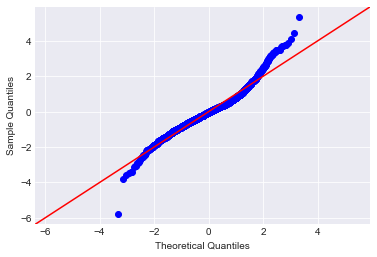

In [81]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

> The residuals appear to be similarly distributed in this second iteration of the model as in the first.

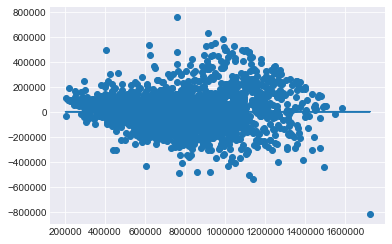

In [82]:
plt.scatter(model2.predict(X_int_2), model2.resid)
plt.plot(model2.predict(X_int_2), [0 for i in range(len(X_int_2))]);

>The heteroscedasticity of the data appears to be largely unchanged. 

## Eliminate multicollinearity and high p-values

We will now feature engineer for the third iteration of the model by removing other independent variables that are not significant based on their p_values and multicollinearity

In [83]:
trained3 = trained2.drop(columns = ["reno_2000_over"]) # This is the only feature with a high p_value

In [84]:
trained3.corr().applymap(lambda val: abs(val) >= 0.75)

,date,bathrooms,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,reno_never,wat_1.0,...,bed_7,zip_98006,zip_98033,zip_98039,zip_98040,zip_98053,zip_98074,zip_98075,zip_98077,zip_98112
date,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
reno_never,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
wat_1.0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [85]:
corr_data = trained3.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_data[corr_data[0] < 1][:20]

,level_0,level_1,0
177,sqft_living15,sqft_above,0.693520
57,sqft_above,sqft_living15,0.693520
51,sqft_above,bathrooms,0.658669
27,bathrooms,sqft_above,0.658669
327,flo_2.0,sqft_above,0.630580
63,sqft_above,flo_2.0,0.630580
154,long,yr_built,0.589931
106,yr_built,long,0.589931
580,zip_98077,lat,0.557837
148,lat,zip_98077,0.557837


>While there are no extremely correlated features (above 0.75) there still seems to be potential mulitcollinearity between sqft_above and other features. We will remove sqft_above to see if it improves the model.

In [86]:
trained3.drop(columns = "sqft_above", inplace = True)

>Update the test data to match the train data

In [87]:
test3 = test2.drop(columns = ["sqft_above"])

In [88]:
len(trained3), len(y_train)

(2334, 2334)

## Run model number 3

In [89]:
X_int_3 = sm.add_constant(trained3)
model3 = sm.OLS(y_train, X_int_3).fit()
summary3 = model3.summary()
summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     209.1
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:43:53   Log-Likelihood:                -31279.
No. Observations:                2334   AIC:                         6.261e+04
Df Residuals:                    2309   BIC:                         6.275e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.286e+08   2.95e+07     -7.751      0.000   -2.86e+08   -1.71e+08
date            100.3252     29.596      3.390      0.001      42.289     158.362
bathrooms      1.165e+05   6909.634     16.859      0.000    1.03e+05     1.3e+05
sqft_basement    15.3388      8.495      1.806      0.071      -1.319      31.997
yr_built        890.2440    228.998      3.888      0.000     441.181    1339.307
lat            4.949e+05   2.16e+05      2.295      0.022     7.2e+04    9.18e+05
long          -1.063e+06   1.64e+05     -6.493      0.000   -1.38e+06   -7.42e+05
sqft_living15   165.0831      6.023     27.409      0.000     153.272     176.894
reno_never    -2.272e+04   8409.733     -2.701      0.007   -3.92e+04   -6227.440
wat_1.0         4.24e+05   6.77e+04      6.265      0.000    2.91e+05    5.57e+05
con_5          5.333e+04   1.41e+04      3.784      0.000    2.57e+04     8.1e+04
gra_11         1.533e+05   1.67e+04      9.161      0.000    1.21e+05    1.86e+05
gra_12         2.115e+05   4.08e+04      5.178      0.000    1.31e+05    2.92e+05
flo_2.0        2.024e+04   9643.525      2.099      0.036    1330.728    3.92e+04
flo_3.0       -4.439e+04   3.95e+04     -1.124      0.261   -1.22e+05    3.31e+04
bed_7         -2.533e+05   1.63e+05     -1.557      0.120   -5.72e+05    6.57e+04
zip_98006     -2.552e+05   2.04e+04    -12.493      0.000   -2.95e+05   -2.15e+05
zip_98033     -2.778e+05    2.1e+04    -13.255      0.000   -3.19e+05   -2.37e+05
zip_98039      1.049e+05   5.03e+04      2.084      0.037    6202.992    2.04e+05
zip_98040     -1.214e+05   2.08e+04     -5.822      0.000   -1.62e+05   -8.05e+04
zip_98053     -2.558e+05   3.68e+04     -6.949      0.000   -3.28e+05   -1.84e+05
zip_98074     -2.712e+05   2.97e+04     -9.123      0.000    -3.3e+05   -2.13e+05
zip_98075     -2.241e+05   3.31e+04     -6.778      0.000   -2.89e+05   -1.59e+05
zip_98077     -3.706e+05   4.27e+04     -8.684      0.000   -4.54e+05   -2.87e+05
zip_98112     -1.531e+05   2.36e+04     -6.498      0.000   -1.99e+05   -1.07e+05
==============================================================================
Omnibus:                      223.896   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.445
Skew:                           0.577   Prob(JB):                    1.18e-112
Kurtosis:                       4.993   Cond. No.                     6.52e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> * Our **model3** has an adjusted R squared value of .682.
* The Skew is 0.577
* The Kurtosis is 4.993
* The Jarque-Bera score is 515.445
* There are 2334 observations
* The Df Model is 24
* The train RMSE is 159918

In [90]:
y_hat3 = model3.predict()
train_rmse3 = mean_squared_error(y_train ,y_hat3)**.5
train_rmse3

159918.8341062173

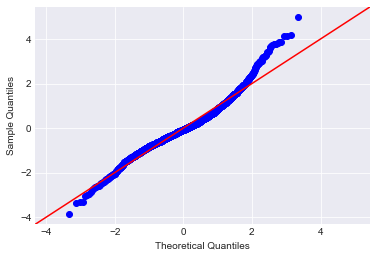

In [91]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

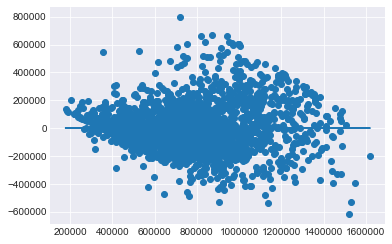

In [92]:
plt.scatter(model3.predict(X_int_3), model3.resid)
plt.plot(model3.predict(X_int_3), [0 for i in range(len(X_int_3))]);

> In this third iteration of the model, the r squared has decreased and our mean square error increases. The model displays slightly more normally distributed residuals, but still some heteroscedasticity. It appears that the previous changes did not improve the model significantly. 

> We will try adding back in sqft_above to the model for the fourth iteration.

In [93]:
trained4 = trained2.drop(columns = ["reno_2000_over"])  # Rather than adding the column back, we took the dataframe
# back 2 iteration and didn't remove sqft_above as we had before

>Update the test data to match the train data

In [94]:
test4 = test2.drop(columns = ["reno_2000_over"])

## Run model number 4

In [95]:
X_int_4 = sm.add_constant(trained4)
model4 = sm.OLS(y_train, X_int_4).fit()
summary4 = model4.summary()
summary4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     280.9
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:49:14   Log-Likelihood:                -30996.
No. Observations:                2334   AIC:                         6.204e+04
Df Residuals:                    2308   BIC:                         6.219e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.608e+08   2.62e+07     -9.967      0.000   -3.12e+08   -2.09e+08
date            115.6944     26.232      4.410      0.000      64.254     167.135
bathrooms      3.573e+04   6913.464      5.168      0.000    2.22e+04    4.93e+04
sqft_above      169.9176      6.755     25.154      0.000     156.671     183.164
sqft_basement   103.4460      8.302     12.460      0.000      87.166     119.726
yr_built        939.5982    202.926      4.630      0.000     541.662    1337.534
lat            4.593e+05   1.91e+05      2.404      0.016    8.46e+04    8.34e+05
long          -1.247e+06   1.45e+05     -8.587      0.000   -1.53e+06   -9.62e+05
sqft_living15    79.4780      6.330     12.556      0.000      67.065      91.891
reno_never    -2.363e+04   7452.005     -3.171      0.002   -3.82e+04   -9018.580
wat_1.0        5.378e+05   6.01e+04      8.942      0.000     4.2e+05    6.56e+05
con_5          6.518e+04   1.25e+04      5.216      0.000    4.07e+04    8.97e+04
gra_11         9.245e+04    1.5e+04      6.152      0.000     6.3e+04    1.22e+05
gra_12         1.446e+05   3.63e+04      3.985      0.000    7.34e+04    2.16e+05
flo_2.0       -4.115e+04   8886.891     -4.630      0.000   -5.86e+04   -2.37e+04
flo_3.0       -8.825e+04    3.5e+04     -2.518      0.012   -1.57e+05   -1.95e+04
bed_7         -6.203e+05   1.45e+05     -4.282      0.000   -9.04e+05   -3.36e+05
zip_98006     -2.487e+05   1.81e+04    -13.737      0.000   -2.84e+05   -2.13e+05
zip_98033     -2.783e+05   1.86e+04    -14.989      0.000   -3.15e+05   -2.42e+05
zip_98039        1.2e+05   4.46e+04      2.692      0.007    3.26e+04    2.08e+05
zip_98040     -1.331e+05   1.85e+04     -7.204      0.000   -1.69e+05   -9.69e+04
zip_98053     -2.449e+05   3.26e+04     -7.507      0.000   -3.09e+05   -1.81e+05
zip_98074     -2.454e+05   2.64e+04     -9.311      0.000   -2.97e+05   -1.94e+05
zip_98075     -2.052e+05   2.93e+04     -7.002      0.000   -2.63e+05   -1.48e+05
zip_98077     -3.679e+05   3.78e+04     -9.730      0.000   -4.42e+05   -2.94e+05
zip_98112     -1.594e+05   2.09e+04     -7.636      0.000      -2e+05   -1.18e+05
==============================================================================
Omnibus:                      224.306   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.080
Skew:                           0.481   Prob(JB):                    1.75e-154
Kurtosis:                       5.521   Cond. No.                     6.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+09. This might indicate that there are
strong multicollinearity or other numerical prob

> * Our **model4** has an adjusted R squared value of .750.
* The Skew is 0.481
* The Kurtosis is 5.521
* The Jarque-Bera score is 708.080
* There are 2334 observations
* The Df Model is 25
* The train RMSE is 141674

In [97]:
y_hat4 = model4.predict()
train_rmse4 = mean_squared_error(y_train ,y_hat4)**.5
train_rmse4

141674.3751881596

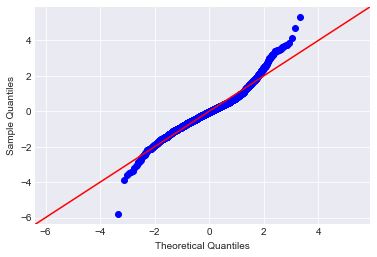

In [98]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

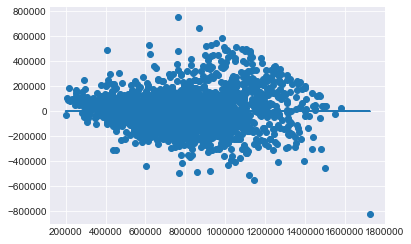

In [99]:
plt.scatter(model4.predict(X_int_4), model4.resid)
plt.plot(model4.predict(X_int_4), [0 for i in range(len(X_int_4))]);

> While the model improved from adding sqft_above back in as an independent variable, it shows similar accuracy average error as model 2, therefore implying that removing renovations from year 2000 and on had little effect.

>Before continuing the iterations, we will run our model on our test set to see if the difference in RSME indicates overfitting

## Check RSME of test set for overfitting of the model

In [100]:
yhat_test = model4.predict(sm.add_constant(test4))

In [101]:
yhat_test

3211     6.225366e+05
15378    4.891039e+05
12183    6.876565e+05
2042     1.104787e+06
4710     7.285789e+05
             ...     
5048     5.639126e+05
11053    7.298729e+05
11754    4.742048e+05
16615    6.721425e+05
6349     1.182858e+06
Length: 584, dtype: float64

In [102]:
test_rmse = mean_squared_error(y_test, yhat_test)**.5
test_rmse

148412.71004992892

>Our model4 training RSME was 141674 versus our testing RSME which was 148412. This indicates that our model has slightly less error in the training data, but still performs fairly well on new data. Therefore, the model doesn't seem to be overfitted.

## Transforming, scaling and other model improvements

Reexamining the relationships between independent and dependent variables, as well as variable distributions

In [103]:
train4_df = pd.concat([trained4, y_train], axis=1)

In [104]:
train4_df.columns

Index(['date', 'bathrooms', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'reno_never', 'wat_1.0', 'con_5', 'gra_11',
       'gra_12', 'flo_2.0', 'flo_3.0', 'bed_7', 'zip_98006', 'zip_98033',
       'zip_98039', 'zip_98040', 'zip_98053', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98112', 'price'],
      dtype='object')

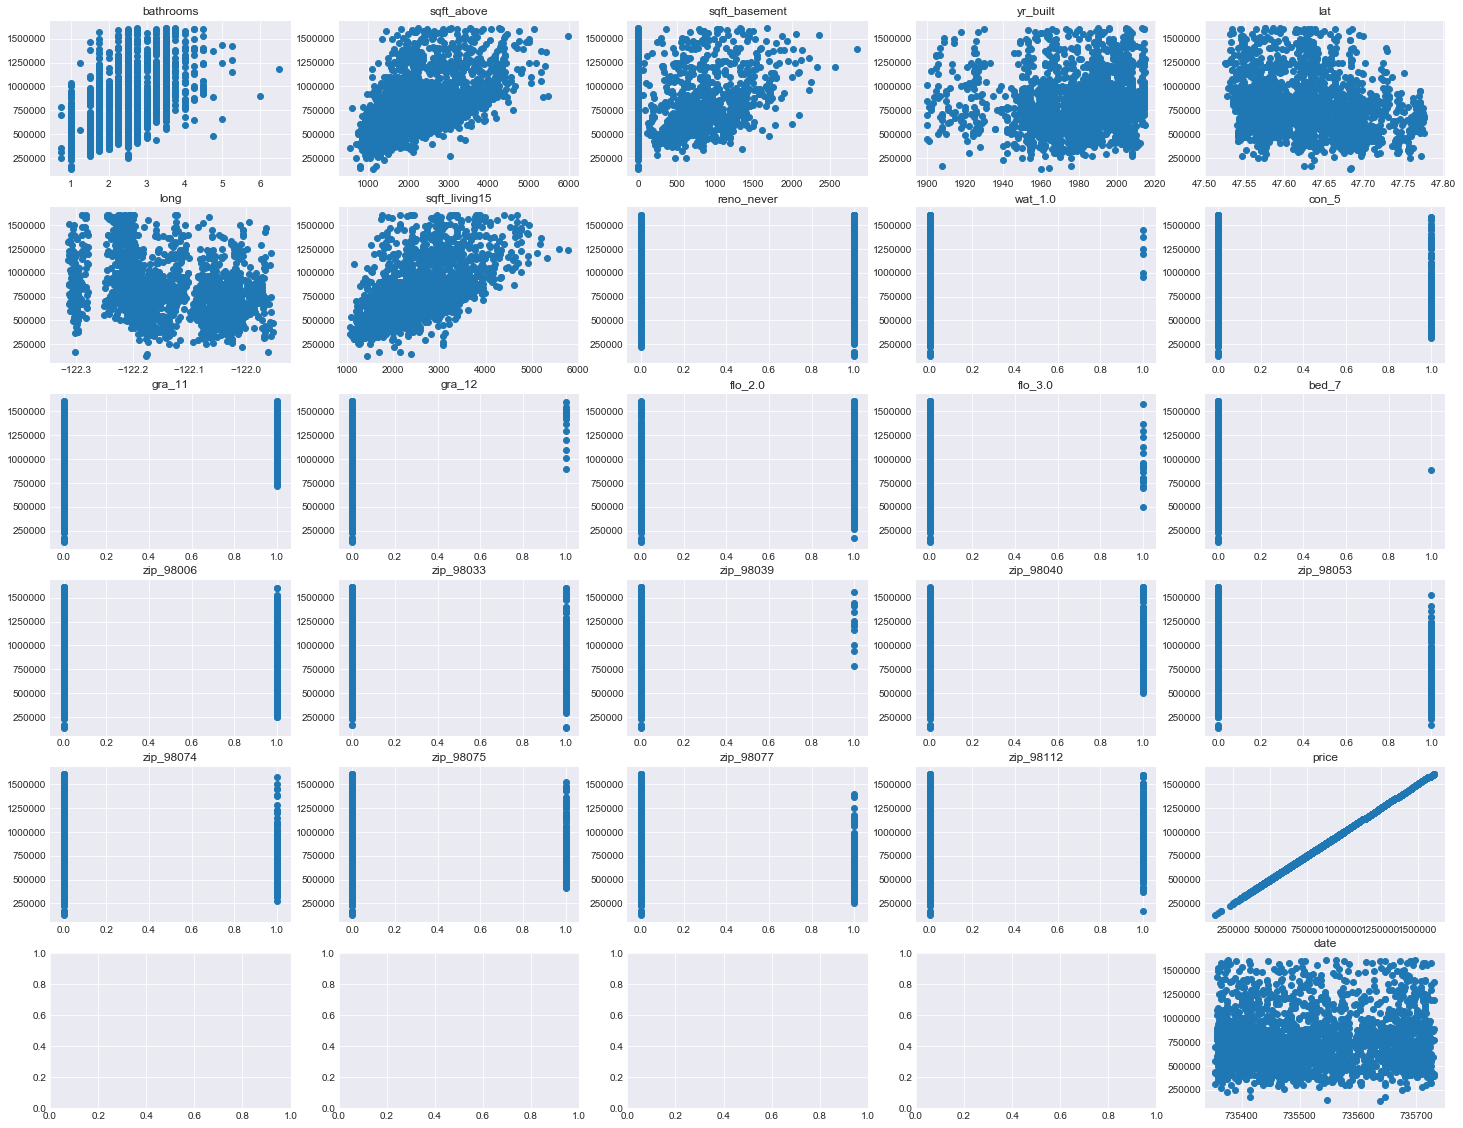

In [105]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(25,20))
plt.title('Graphs')
for n, column in enumerate(train4_df.columns):
    row=(n-1)//5
    col=n%5 -1
    ax=axes[row][col]
    x=train4_df[column]
    y=train4_df.price
    ax.scatter(x, y)
    ax.set_title(train4_df.columns.values[n])
plt.show()

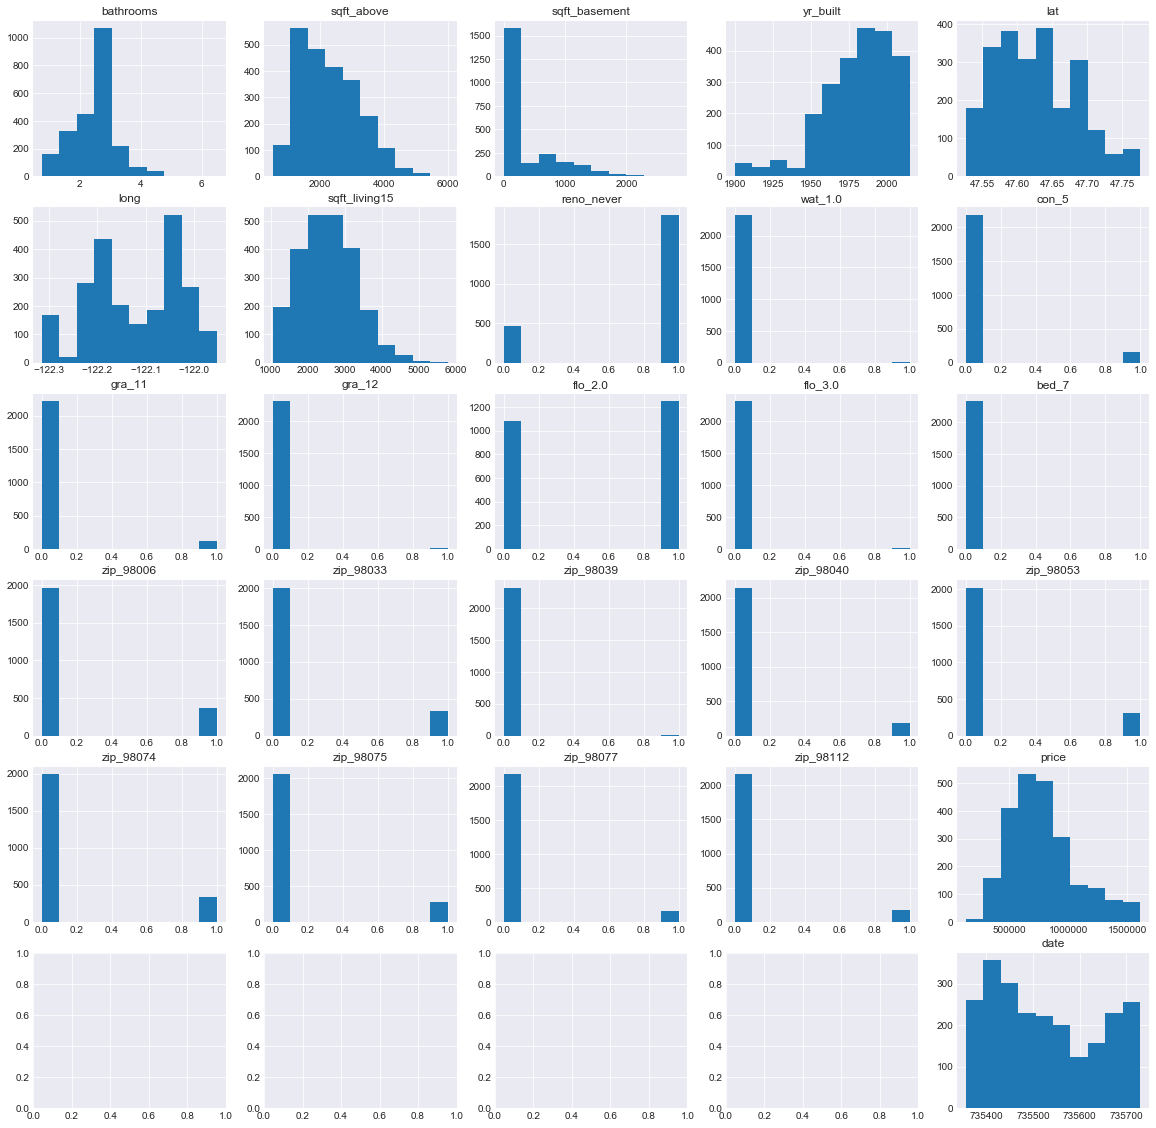

In [106]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,20))
plt.title('Graphs')
x = train4_df.price
for n in range(len(train4_df.columns)):
    row=(n-1)//5
    col=n%5-1
    ax=axes[row][col]
    y=train4_df.iloc[:,n]
    ax.hist(y)
    ax.set_title(train4_df.columns.values[n])
plt.show()   

In [109]:
log_names_test = [f'{column}_log' for column in test5_cont.columns]
df_log_test = np.log(test5_cont)
df_log_test.columns=log_names_test
df_log_test

NameError: name 'test5_cont' is not defined

NameError: name 'df_log_train' is not defined

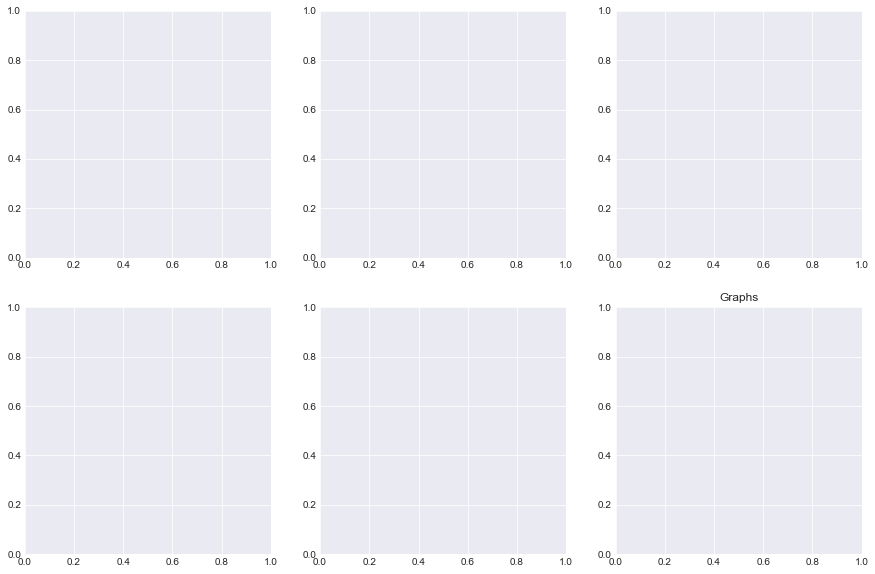

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
plt.title('Graphs')
for n in range(len(df_log_train.columns)):
    row=(n-1)//3
    col=n%3-1
    ax=axes[row][col]
    y=df_log_train.iloc[:,n]
    ax.hist(y)
    ax.set_title(df_log_train.columns.values[n])
plt.show()   

In [ ]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log_train.apply(normalize)
df_log_norm

In [ ]:
df_log_norm_test = df_log_test.apply(normalize)
df_log_norm_test

In [ ]:
trained5_log = pd.concat([df_log_norm, trained5.drop(columns = ["bathrooms", "sqft_above", "yr_built", "lat", "sqft_living15", "date"])], axis =1)

In [ ]:
trained5_log

In [ ]:
test5_log = pd.concat([df_log_norm_test, test5.drop(columns = ["bathrooms", "sqft_above", "yr_built", "lat", "sqft_living15", "date"])], axis =1)

In [ ]:
test5_log

In [ ]:
X_int_5 = sm.add_constant(trained5_log)
model5 = sm.OLS(y_train, X_int_5).fit()
summary5 = model5.summary()
summary5

In [ ]:
y_hat5 = model5.predict()
y_hat5

In [ ]:
train_rmse5 = mean_squared_error(y_train ,y_hat5)**.5
train_rmse5

We will now try log transforming the dependent variable to make it more normal and of the same magnitude of the other variables.

In [ ]:
yt_log = np.log(y_train)
y_train_log = normalize(yt_log)

In [ ]:
model6 = sm.OLS(y_train_log, X_int_5).fit()
summary6 = model6.summary()
summary6

In [ ]:
yhat6_log = model6.predict()
yhat6 = np.exp((yhat6_log * yt_log.std())+ yt_log.mean())
yhat6

In [ ]:
train_rmse6 = mean_squared_error(y_train ,yhat6)**.5
train_rmse6

In [ ]:
yhat6_log = model6.predict()
train_rmse6 = mean_squared_error(y_train_log ,yhat6_log)**.5
train_rmse6

In [ ]:
fig = sm.graphics.qqplot(model6.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
plt.scatter(model6.predict(X_int_5), model6.resid)
plt.plot(model6.predict(X_int_5), [0 for i in range(len(X_int_5))]);

## Examine polynomial features and/or interactions

In [ ]:
continuous = ['date','bathrooms','sqft_living','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']

In [ ]:
y = y_train
X = X_train[continuous]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))
X_poly_df
# print(poly.get_feature_names())
# print(X_poly[0])

In [ ]:
from sklearn.feature_selection import RFE
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=20)
selector = selector.fit(X_poly_df, y)
selector.support_
# selector.ranking_

In [ ]:
poly_feature_list = list(filter(lambda x: x[1] == True, list(zip(X_poly_df.columns, selector.support_))))

In [ ]:
cols = [x[0] for x in poly_feature_list]
cols

In [ ]:
X_train_cat = X_train.drop(columns = continuous)
X_train_cat

In [ ]:
cat_index_list=list(X_train_cat.index)

In [ ]:
X_poly_df = X_poly_df[cols]

In [ ]:
X_poly_df['idx'] = cat_index_list
X_poly_df

In [ ]:
X_poly_df.set_index('idx',inplace=True)

In [ ]:
X_poly_reg = pd.concat([X_poly_df, X_train_cat], axis=1)
X_poly_reg.head()

In [ ]:
X_poly_reg.columns

In [ ]:
X_int_poly = sm.add_constant(X_poly_reg)
model_poly = sm.OLS(y_train, X_int_poly).fit()
summary_poly = model_poly.summary()
summary_poly

In [ ]:
y_hat_poly = model_poly.predict()

In [ ]:
train_rmse_poly = mean_squared_error(y_train ,y_hat_poly)**.5
train_rmse_poly

In [ ]:
fig = sm.graphics.qqplot(model_poly.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
plt.scatter(model_poly.predict(X_int_poly), model_poly.resid)
plt.plot(model_poly.predict(X_int_poly), [0 for i in range(len(X_int_poly))]);

In [ ]:
p_table = summary_poly.tables[1]
p_table

In [ ]:
p_table_df = pd.DataFrame(p_table.data)
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']
p_table_df.drop(labels=0,axis=0,inplace=True)
p_table_df.set_index('column',inplace=True)
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)
p_table_df.info()

In [ ]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)
pass_list=list(p_table_df[p_table_df['pass']==True].index)
pass_list


In [ ]:
trained_poly = X_poly_reg[pass_list]

In [ ]:
trained_poly.corr()

In [ ]:
trained_poly.corr().applymap(lambda val: abs(val) >= 0.75)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
corr_data = trained_poly.corr().abs().stack().reset_index().sort_values(0, ascending=False)
table = corr_data[(corr_data[0] < 1) & (corr_data[0] > .75)]
table

While there is some improvement in the RMSE compared to other models, there is so much multicollinearity in this model that we feel it invalidates our model assumptions.

At this point, we will start with our logged and scaled model that has already been adjusted for multicollinearity and look at the interactions again from this point.

In [ ]:
summary6

In [ ]:
continuous = ['bathrooms_log','sqft_above_log','yr_built_log','lat_log','sqft_living15_log','date_log']
categorical_df = trained5_log.drop(columns = continuous,axis=1)
categorical_df.drop(columns = 'zip_98112',axis=1,inplace=True)

In [ ]:
y = y_train_log
X = trained5_log[continuous]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))
X_poly_df
# print(poly.get_feature_names())
# print(X_poly[0])

In [ ]:
from sklearn.feature_selection import RFE
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(X_poly_df, y)
selector.support_
selector.ranking_

In [ ]:
# poly_feature_list = list(filter(lambda x: x[1] == True, list(zip(X_poly_df.columns, selector.ranking_))))

In [ ]:
def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1])  
    return tup

In [ ]:
Sort_Tuple(list(zip(X_poly_df.columns, selector.ranking_)))

In our interpretation, almost all of our logged features are more important to the model on their own rather than in an interaction or polynomial except for date_log^2.  So we will add this one polynomial to model and reassess.

In [ ]:
X['date_log^2'] = X['date_log'].map(lambda x: x**2)
X.head(25)

In [ ]:
X_poly_df['date_log^2']

In [ ]:
X.drop(columns = 'date_log', inplace=True)

In [ ]:
trained7 = pd.concat([X, categorical_df], axis=1)
trained7

In [ ]:
X_int_7 = sm.add_constant(trained7)
model_7 = sm.OLS(y_train_log, X_int_7).fit()
summary_7 = model_7.summary()
summary_7

In [ ]:
yhat7_log = model_7.predict()
yhat7 = np.exp((yhat7_log * yt_log.std())+ yt_log.mean())
yhat7

In [ ]:
train_rmse7 = mean_squared_error(y_train ,yhat7)**.5
train_rmse7

At this point, we have not seen significant improvement in our model by adding the polynomial, log transformation, or scaling.  We feel the best model to predict our data that has also met all of the assumptions needed for the model has been model_4.

## Cross validation

In [ ]:
linreg=LinearRegression()
linreg.fit(trained4, y_train)

y = remove_outliers(df_joined, "price")["price"]
X = remove_outliers(df_joined, "price").drop(columns = "price", axis=1)

mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring = mse)
cv_5_results.mean()

In [ ]:
(cv_5_results**.5).mean()

Comparing this to our train test split case we get very similar results for RMSE, indicating that our results aren't distorted due to the inherent randomness of the train test split.